### Import Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(X_test.shape, y_test.shape)

(10000, 32, 32, 3) (10000, 1)


### Visualize Data

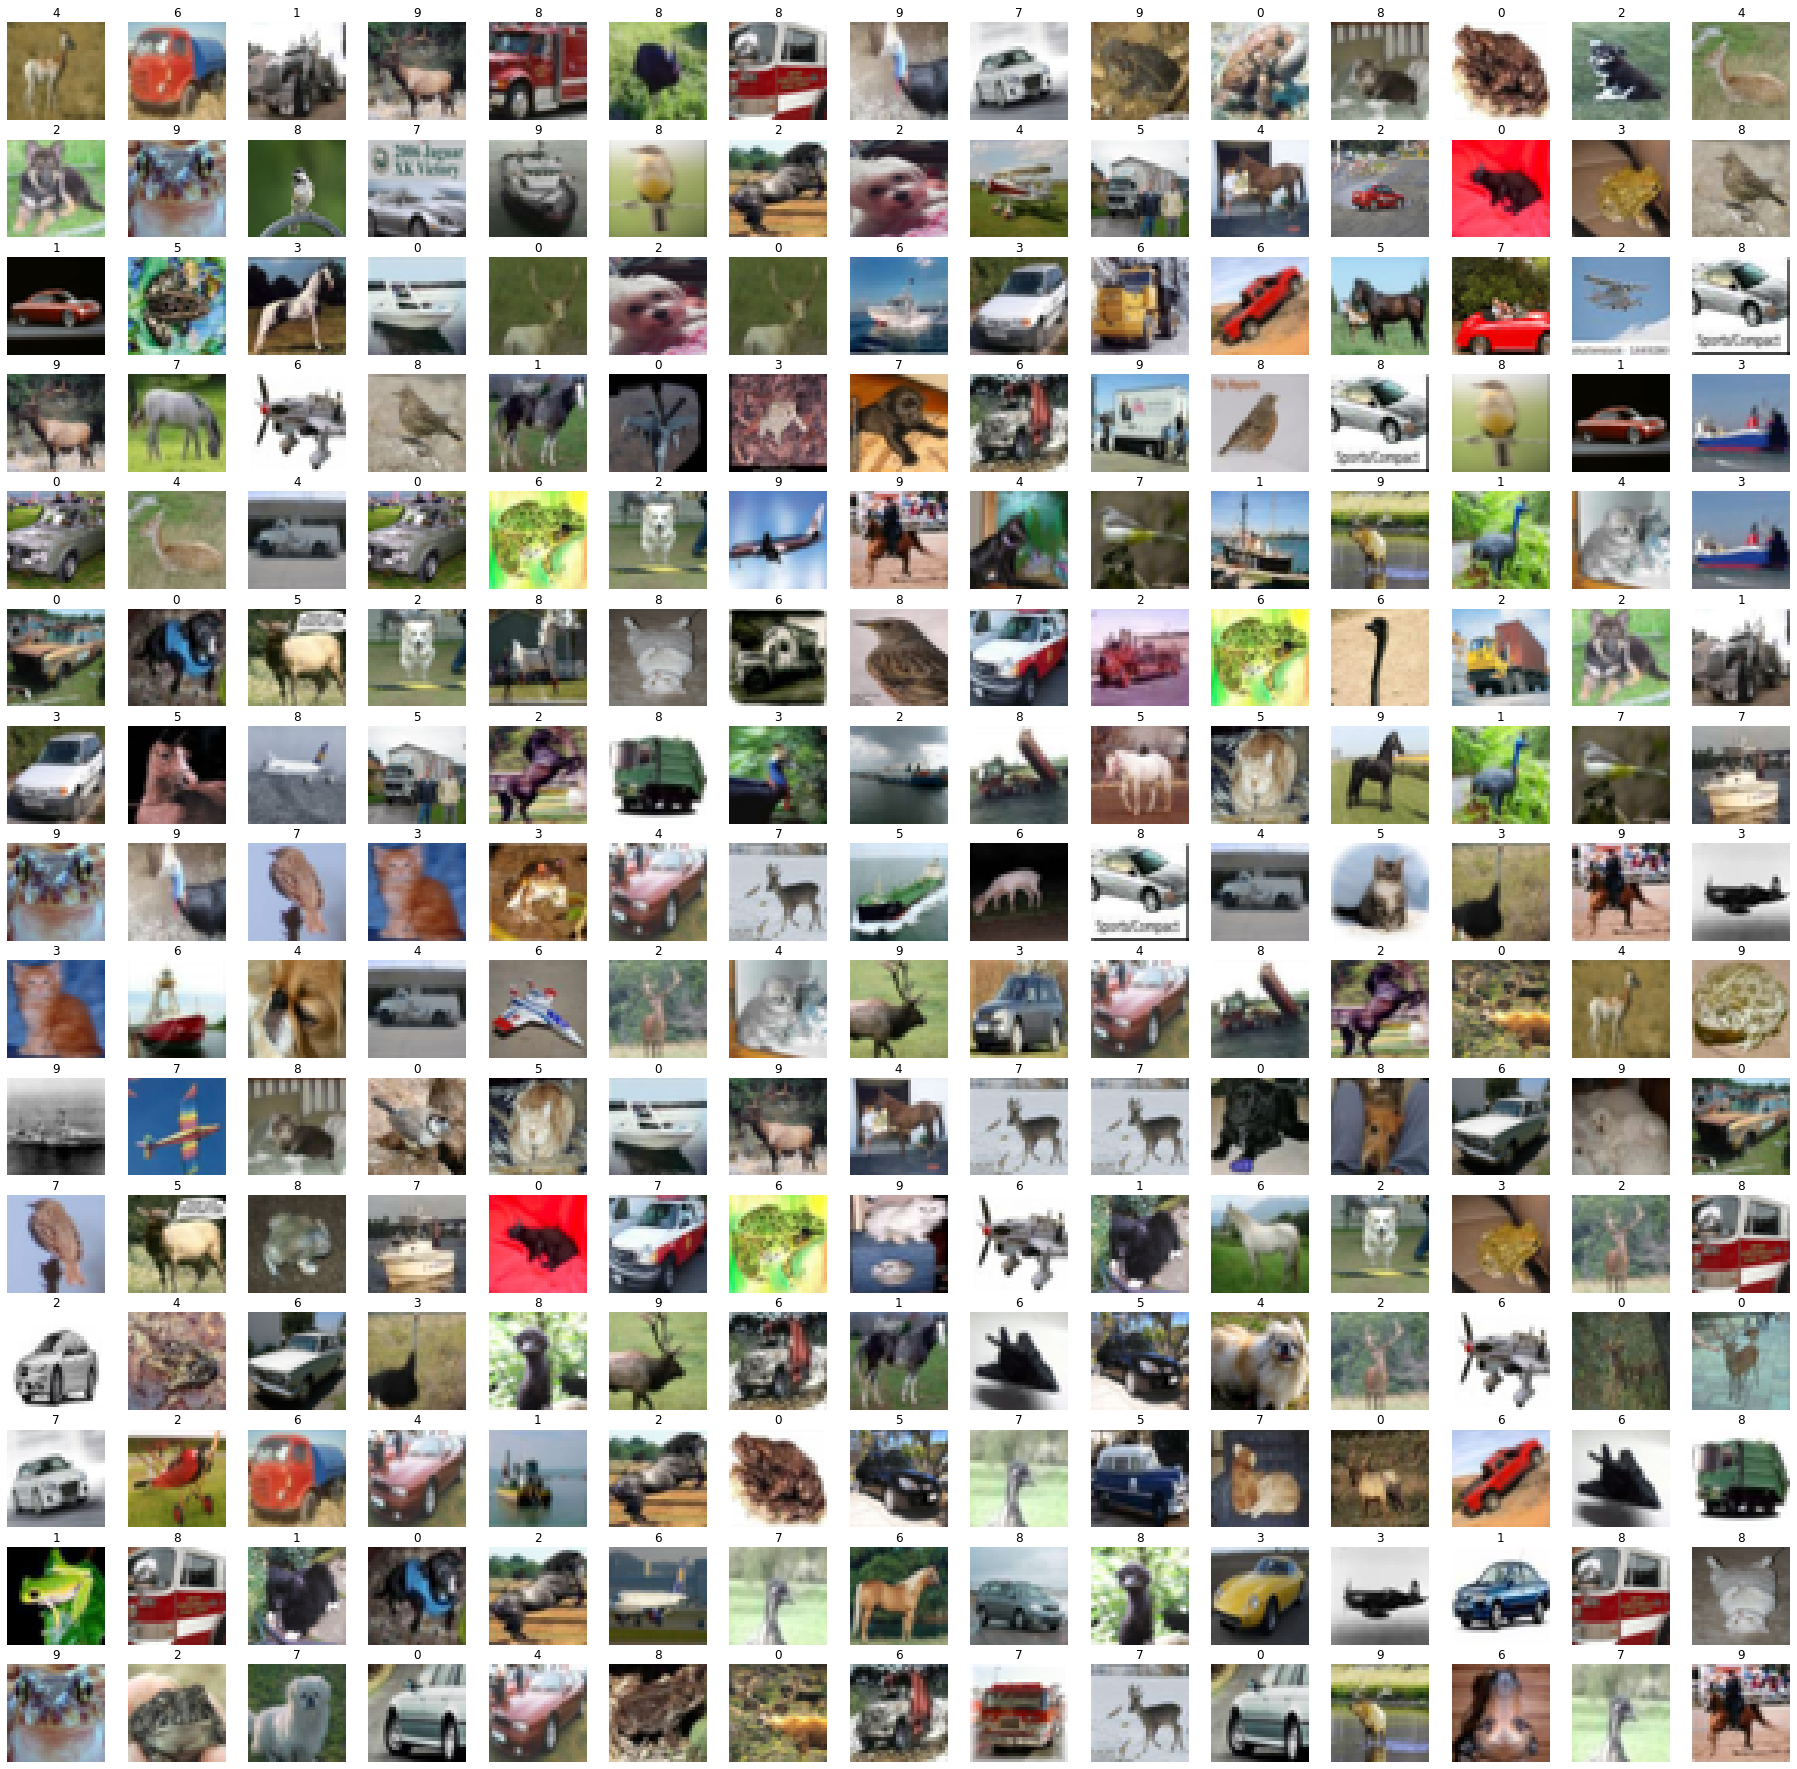

In [4]:
w = 32
h = 32
fig = plt.figure(figsize=(w, h))
columns = 15
rows = 15
for i in range(1, columns*rows +1):
    img = np.random.randint(rows*columns)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[img])
    plt.title(str(y_test[img][0]))
    plt.axis('off')
plt.show()

### Data preparation for fitting into model

In [5]:
from tensorflow.keras.utils import to_categorical

n_categories = 10

y_train = to_categorical(y_train, n_categories)
y_test = to_categorical(y_test, n_categories)

print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [6]:
X_train = X_train / 255
X_test = X_test / 255

print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [7]:
in_shape = X_test.shape[1:]
in_shape

(32, 32, 3)

### Make and train model

In [8]:
# Import Stuff

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=in_shape, activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))

cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))

cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024,activation='relu'))
cnn_model.add(Dense(units=1024,activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [10]:
from tensorflow.keras.optimizers import RMSprop
cnn_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [11]:
history = cnn_model.fit(X_train, y_train, batch_size=32,epochs=5, shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.6284 - accuracy: 0.4126
Epoch 2/5
1563/1563 [==============================] - 226s 145ms/step - loss: 1.2595 - accuracy: 0.5606
Epoch 3/5
1563/1563 [==============================] - 222s 142ms/step - loss: 1.1334 - accuracy: 0.6068
Epoch 4/5
1563/1563 [==============================] - 195s 125ms/step - loss: 1.0858 - accuracy: 0.6316
Epoch 5/5
1563/1563 [==============================] - 193s 124ms/step - loss: 1.0603 - accuracy: 0.6385


In [12]:
test = cnn_model.predict_classes(X_test)
test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [13]:
y_test.argmax(1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [14]:
acc = cnn_model.evaluate(X_test, y_test)[1]
print("Accuracy of model : {}".format(acc))

313/313 [==============================] - 9s 28ms/step - loss: 1.0334 - accuracy: 0.6395
Accuracy of model : 0.6395000219345093


### Save the model

In [15]:
import os

cdir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(cdir):
    os.makedirs(cdir)
    
model_path = os.path.join(cdir, 'keras_cifar_10_model.h5')
cnn_model.save(model_path)

In [20]:
classes = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck",
}

In [21]:
res = cnn_model.predict_classes(X_test)

In [38]:
print ("{:<18} {:<25}".format("Orignal","Predicted"))
for i in range(0, 50):
    print ("{:<18} {:<25}".format(classes[y_test.argmax(1)[i]], classes[res[i]]))

Orignal            Predicted                
cat                cat                      
ship               ship                     
ship               ship                     
airplane           airplane                 
frog               frog                     
frog               frog                     
automobile         automobile               
frog               frog                     
cat                deer                     
automobile         truck                    
airplane           deer                     
truck              truck                    
dog                deer                     
horse              horse                    
truck              truck                    
ship               frog                     
dog                cat                      
horse              cat                      
ship               ship                     
frog               frog                     
horse              horse                    
airplane  

Text(0.5, 1.0, 'ship')

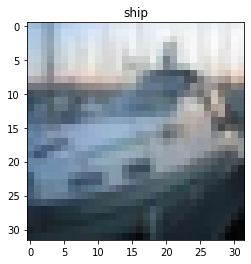

In [42]:
plt.imshow(X_test[2])
plt.title(classes[res[2]])